In [1]:
RESULTS_ZIP_FILE = "../../results/sketchSynthBootstrap/sketchSynthBootstrap.zip"
RESULTS_FOLDER_DESTINATION = "../../results/sketchSynthBootstrap"

In [2]:
import zipfile

with zipfile.ZipFile(RESULTS_ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall(RESULTS_FOLDER_DESTINATION)


In [2]:
RESULTS_FOLDER = "../../results/sketchSynthBootstrap/sketchSynthBootstrap"

In [3]:
import os

list_all_files = os.listdir(RESULTS_FOLDER)
len(list_all_files)

1958

In [5]:
%run ../../utils/postprocessing.py --folder ../../results/sketchSynthBootstrap/sketchSynthBootstrap --suffix .txt

  0%|          | 0/1958 [00:00<?, ?it/s]

100%|██████████| 1958/1958 [00:11<00:00, 176.98it/s]


In [9]:
%run ../../utils/extract_screenshots --folder ../../results/sketchSynthBootstrap/sketchSynthBootstrap --webGenerator

Generating Screenshots...


100%|██████████| 1958/1958 [36:03<00:00,  1.11s/it]  

Generated 1958 PNG files in 2163.9 seconds. Files are in results/.


In [29]:
# Copy original sketches from dataset for the test samples in the result folder
SKETCHES_FOLDER = "../../../../../sketch_synthBoostrap/sketches"

In [34]:
import shutil

for file in list_all_files:
    if (file.endswith("_answer.txt")):
        sketch_file_name = file.replace("rw", "sketch").replace("_answer.txt", ".png")
        shutil.copy(SKETCHES_FOLDER + "/" + sketch_file_name, RESULTS_FOLDER + "/" + sketch_file_name )

In [43]:
# NOTE: this was run from command line to use multiprocessing
#%run ../../utils/calculate_metrics --folder ../../results/sketchSynthBootstrap/sketchSynthBootstrap 

In [3]:
import pandas as pd
import os
import json

# Load all json files into a list of dataframes
all_json_files = [RESULTS_FOLDER + "/" + file for file in os.listdir(RESULTS_FOLDER) if file.endswith(".json")]

dataframes = []

for file_path in all_json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
    dataframes.append(pd.DataFrame([data]))  # Convert dictionary to a single-row DataFrame

# Combine all dataframes into one
df = pd.concat(dataframes, ignore_index=True)


In [4]:
df.rename(columns={
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    's_bleu': 'structural_BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
    'ted': 'HTML_tree_edit_distance',
    'n_ted': 'normalized_HTML_tree_edit_distance',
    'ssim_index': 'similarity_index'
}, inplace=True)


In [5]:
df.describe()

,prediction_length,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance,structural_BLEU_score,HTML_tree_edit_distance,normalized_HTML_tree_edit_distance,similarity_index
count,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,5776.843718,5977.951992,6169.191011,0.824988,1146.678243,0.201848,0.922393,6.618999,0.071623,0.810436
std,2282.461003,2183.119019,2475.026254,0.114862,1066.017938,0.109363,0.071130,11.720627,0.093624,0.096725
min,1616.000000,1816.000000,1826.000000,0.332843,126.000000,0.041240,0.516412,0.000000,0.000000,0.341860
25%,4271.500000,4331.000000,4408.500000,0.766881,478.000000,0.117018,0.906500,0.000000,0.000000,0.750207
50%,5445.000000,5661.000000,5706.000000,0.869885,763.000000,0.169905,0.942879,2.000000,0.037037,0.820364
75%,6794.500000,7214.000000,7326.500000,0.910707,1428.000000,0.267983,0.964500,8.000000,0.104957,0.876562
max,16036.000000,13967.000000,16036.000000,0.959309,6096.000000,0.612100,0.999528,97.000000,0.518717,0.985572


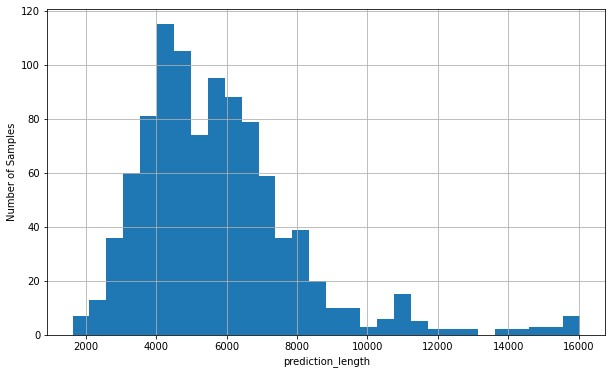

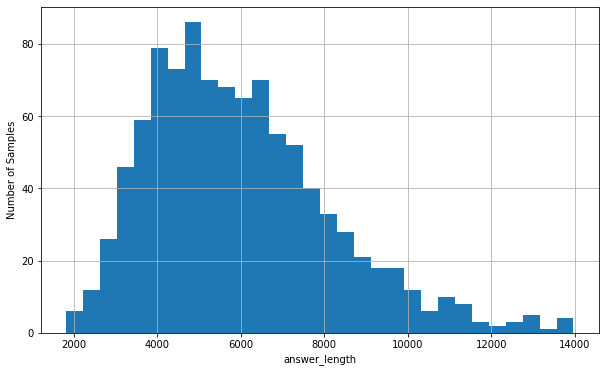

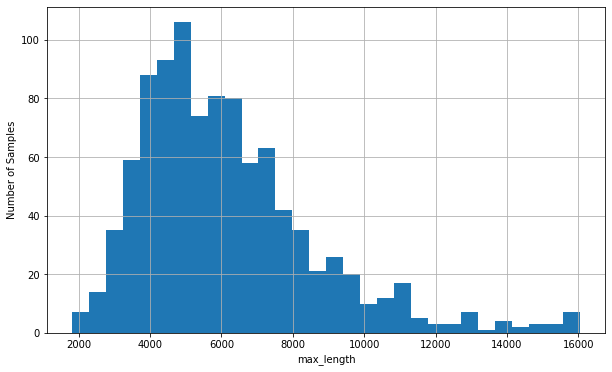

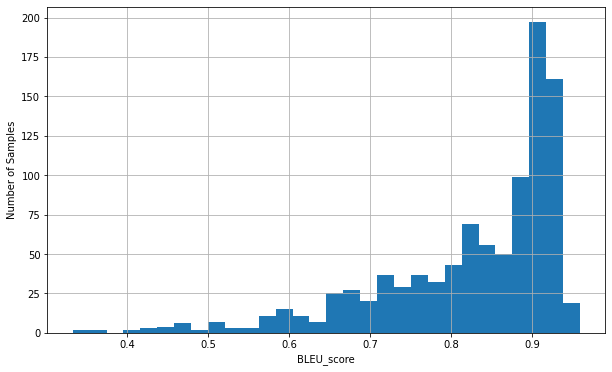

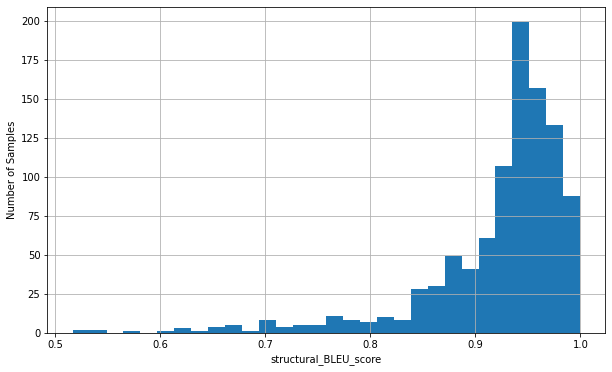

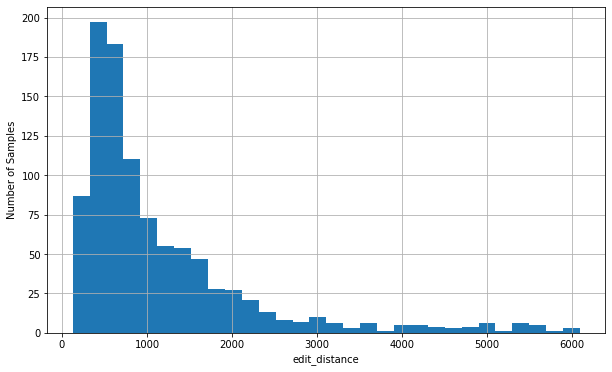

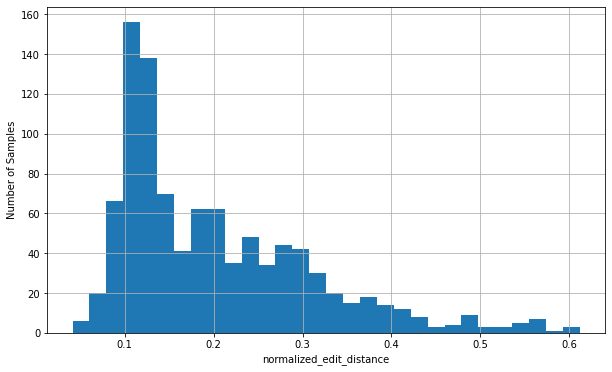

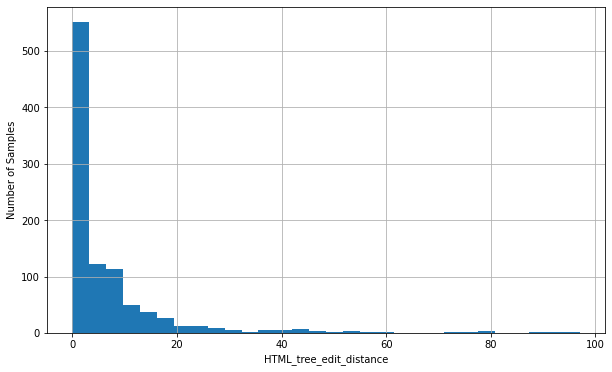

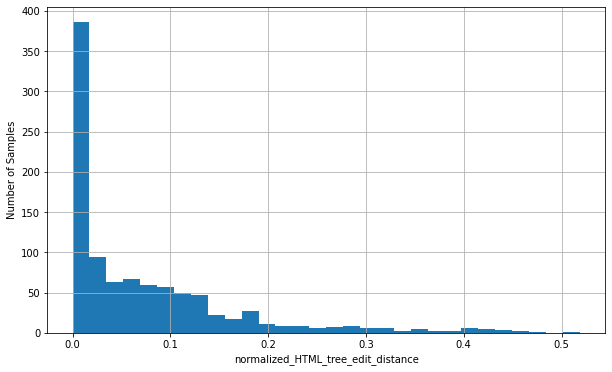

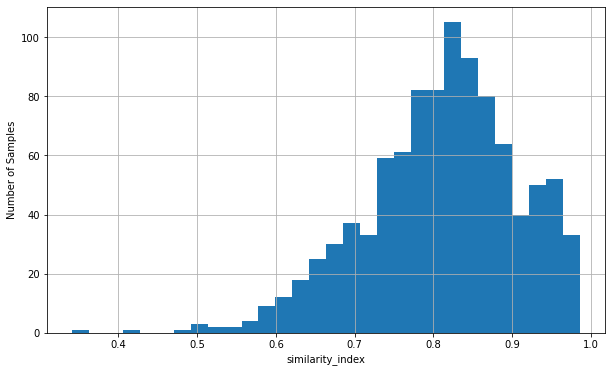

In [7]:
import matplotlib.pyplot as plt

metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score", "structural_BLEU_score", "edit_distance", "normalized_edit_distance", "HTML_tree_edit_distance", "normalized_HTML_tree_edit_distance" , "similarity_index"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    plt.hist(df[metric], bins=30)
    #plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Number of Samples')
    plt.grid(True)
    plt.show()


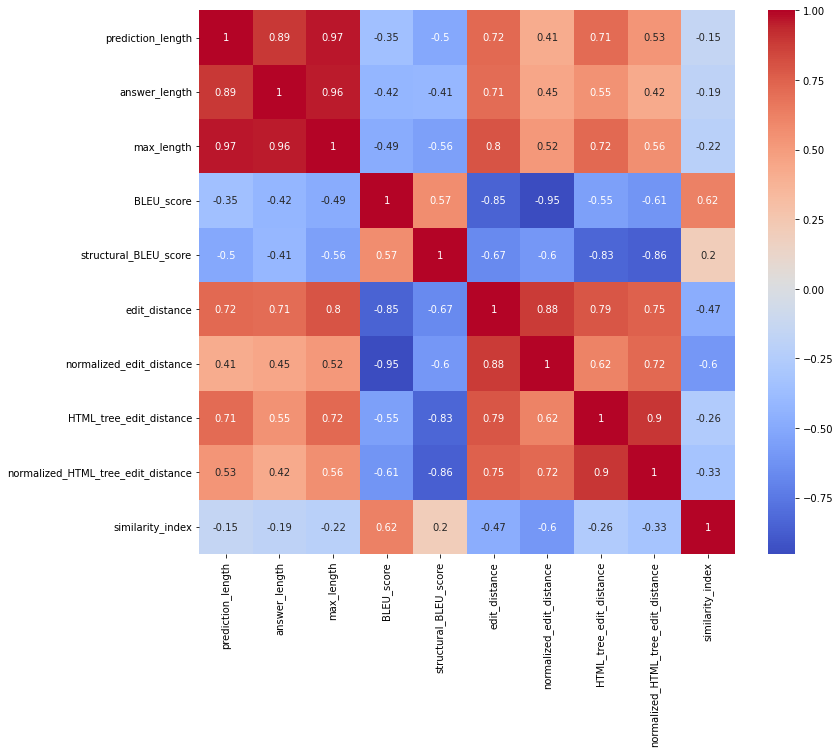

In [8]:
import seaborn as sns
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(12,10))
#plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

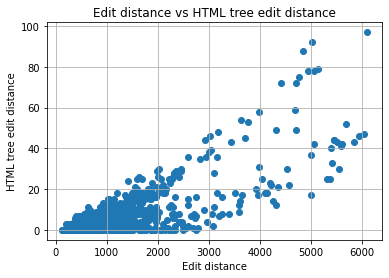

In [9]:
plt.scatter(df["edit_distance"], df["HTML_tree_edit_distance"])
plt.title("Edit distance vs HTML tree edit distance")
plt.xlabel("Edit distance")
plt.ylabel("HTML tree edit distance")
plt.grid(True)
plt.show()


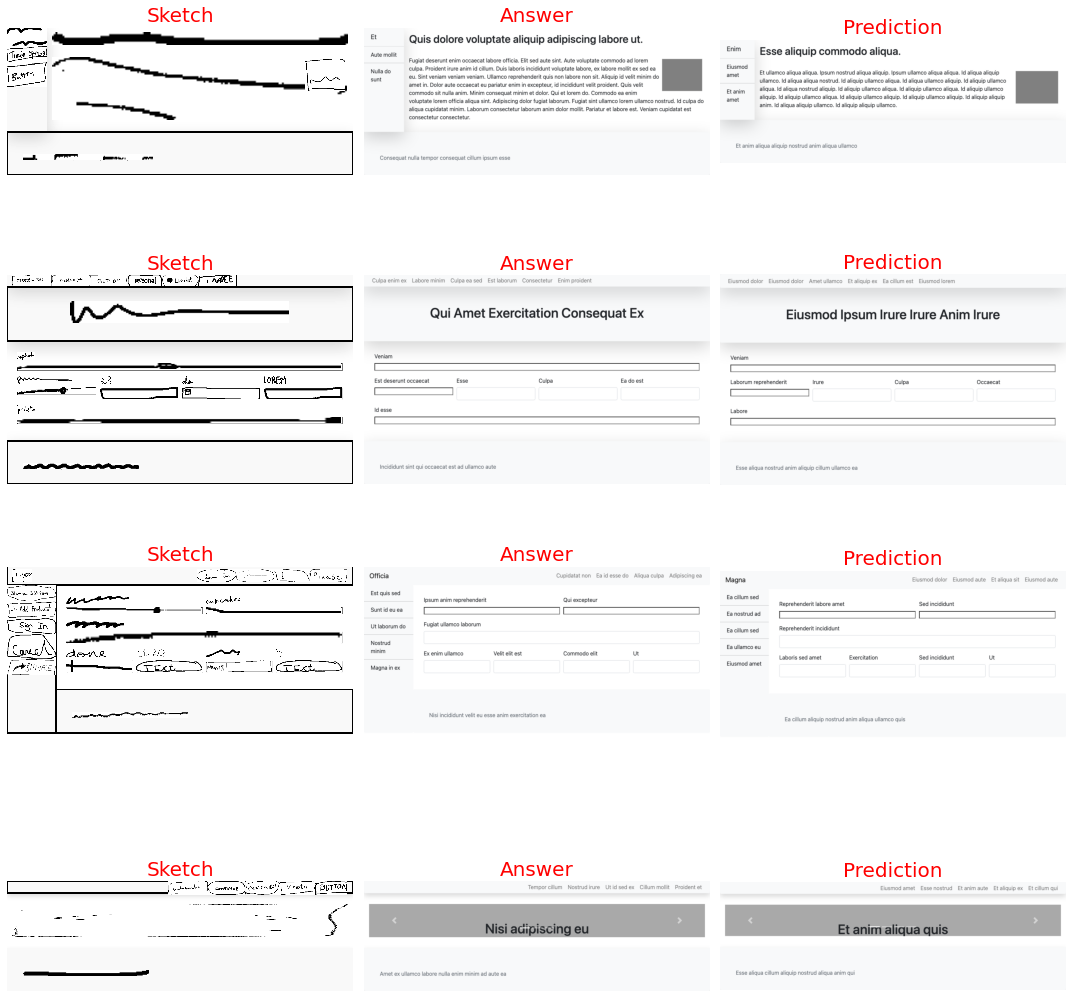

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

NUMBER_DISPLAYED = 4

fig, axes = plt.subplots(NUMBER_DISPLAYED, 3, figsize=(15, NUMBER_DISPLAYED*4))

for idx, json_file_path in enumerate(all_json_files[:NUMBER_DISPLAYED]):
        answer_sketch_img = mpimg.imread(json_file_path.replace("rw_", "sketch_").replace(".json", ".png"))
        answer_img = mpimg.imread(json_file_path.replace(".json", "_answer_processed.png"))
        prediction_img = mpimg.imread(json_file_path.replace(".json", "_pred_processed.png"))
        
        axes[idx, 0].imshow(answer_sketch_img, cmap='gray', interpolation='none')
        axes[idx, 0].set_title('Sketch', fontsize=20, color="red")
        axes[idx, 0].axis('off')

        axes[idx, 1].imshow(answer_img)
        axes[idx, 1].set_title('Answer', fontsize=20, color="red")
        axes[idx, 1].axis('off')

        axes[idx, 2].imshow(prediction_img)
        axes[idx, 2].set_title('Prediction', fontsize=20, color="red")
        axes[idx, 2].axis('off')

plt.tight_layout()

plt.show()
